### Scaling Plots for the Accelerated Computing Lebwohl Lasher Project 

Elliot Ayliffe

In [1]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import matplotlib.ticker as ticker

**Versions vs Lattice Size (nmax):**

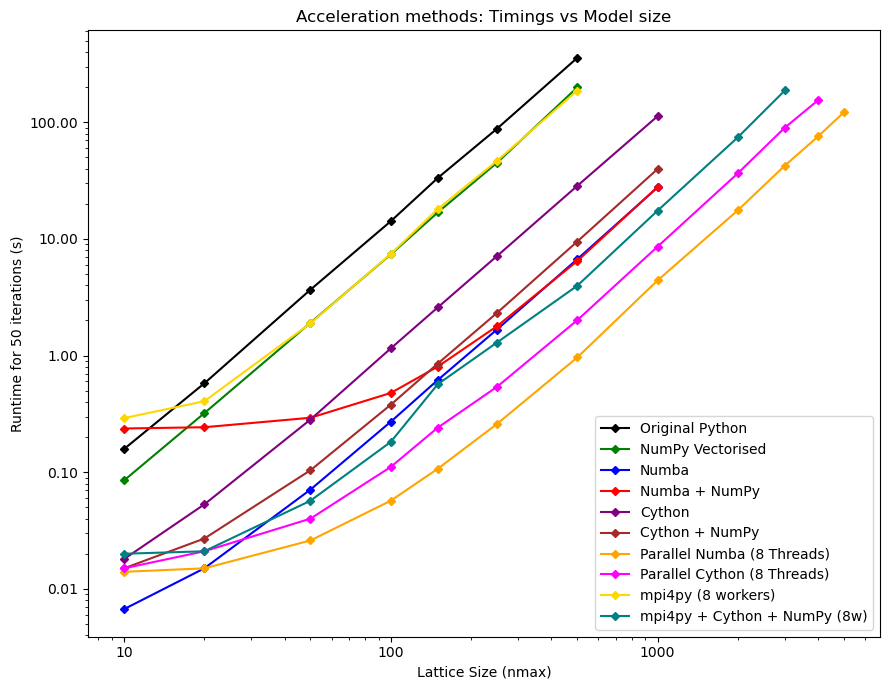

In [2]:
# Load the time vs lattice size data 
lattice_size_df = pd.read_csv('versions_v_size_.csv')

# Define verions 
versions  = ['Original Python',  
            'NumPy Vectorised', 
            'Numba', 
            'Numba + NumPy',
            'Cython', 
            'Cython + NumPy', 
            'Parallel Numba (8 Threads)',
            'Parallel Cython (8 Threads)',
            'mpi4py (8 workers)',
            'mpi4py + Cython + NumPy (8w)']

# Define colours
colours = ['black', 'green', 'blue', 'red', 'purple', 'brown', 'orange', 'magenta', 'gold', 'teal']


fig, ax = plt.subplots(figsize=(9,7))

# Plot each version
for version, colour in zip(versions, colours):
    ax.plot(lattice_size_df['Lattice size'], 
            lattice_size_df[version], 
            label=version, color=colour, 
            marker='D', 
            linestyle='-', 
            markersize=4)

# set log scale for each axis 
ax.set_xscale('log')
ax.set_yscale('log')

# Format plot 
tickformat = ticker.ScalarFormatter() 
ax.xaxis.set_major_formatter(tickformat)
decimal_tick = ticker.FormatStrFormatter('%.2f')
ax.yaxis.set_major_formatter(decimal_tick)

ax.set_xlabel('Lattice Size (nmax)')
ax.set_ylabel('Runtime for 50 iterations (s)')
ax.set_title('Acceleration methods: Timings vs Model size', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()


**Parallel Numba vs Lattice size - nThreads comparison:**

How does parallel numba scale with the number of threads

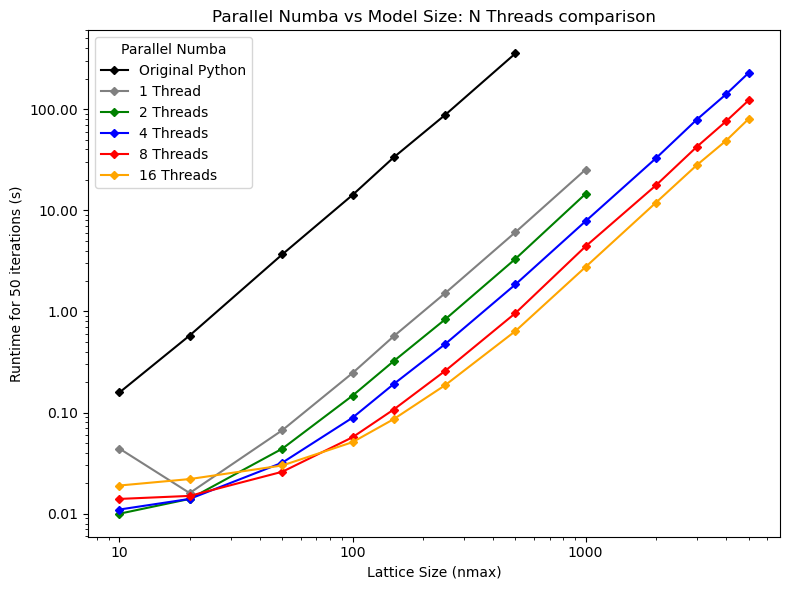

In [3]:
# Load the time vs lattice size data 
Numba_threads_df = pd.read_csv('parallel_numba_v_size.csv')

# Define threads 
nthreads = ['Original Python',
            '1 Thread',  
            '2 Threads', 
            '4 Threads', 
            '8 Threads',
            '16 Threads']

# Define colours
colours_threads = ['black','grey','green', 'blue', 'red', 'orange']


fig, ax = plt.subplots(figsize=(8,6))

# Plot each thread number
for nthread, colour in zip(nthreads, colours_threads):
    ax.plot(Numba_threads_df['Lattice size'], 
            Numba_threads_df[nthread], 
            label=nthread, color=colour, 
            marker='D', 
            linestyle='-', 
            markersize=4)

# set log scale for each axis 
ax.set_xscale('log')
ax.set_yscale('log')

# Format plot 
tickformat = ticker.ScalarFormatter() 
ax.xaxis.set_major_formatter(tickformat)
decimal_tick = ticker.FormatStrFormatter('%.2f')
ax.yaxis.set_major_formatter(decimal_tick)

ax.set_xlabel('Lattice Size (nmax)')
ax.set_ylabel('Runtime for 50 iterations (s)')
ax.legend(title='Parallel Numba')
ax.set_title('Parallel Numba vs Model Size: N Threads comparison', fontsize=12)
plt.tight_layout()
plt.show()

**Parallel Cython (openMP) vs Lattice size: Threads comparison**

How does parallel cython scale with number of threads 

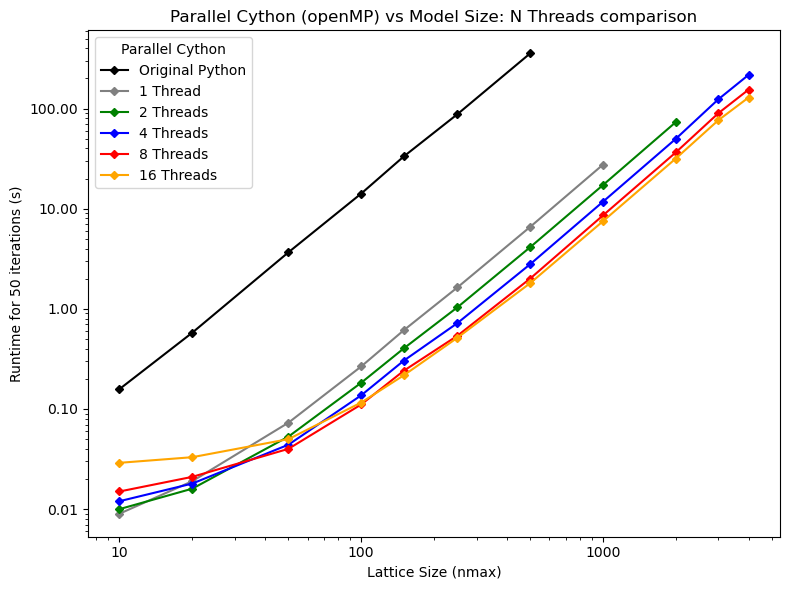

In [4]:
# Load the time vs lattice size data 
Cython_threads_df = pd.read_csv('parallel_cython_v_size.csv')

fig, ax = plt.subplots(figsize=(8,6))

# Plot each thread number
for nthread, colour in zip(nthreads, colours_threads):
    ax.plot(Cython_threads_df['Lattice size'], 
            Cython_threads_df[nthread], 
            label=nthread, color=colour, 
            marker='D', 
            linestyle='-', 
            markersize=4)

# set log scale for each axis 
ax.set_xscale('log')
ax.set_yscale('log')

# Format plot 
tickformat = ticker.ScalarFormatter() 
ax.xaxis.set_major_formatter(tickformat)
decimal_tick = ticker.FormatStrFormatter('%.2f')
ax.yaxis.set_major_formatter(decimal_tick)

ax.set_xlabel('Lattice Size (nmax)')
ax.set_ylabel('Runtime for 50 iterations (s)')
ax.legend(title='Parallel Cython')
ax.set_title('Parallel Cython (openMP) vs Model Size: N Threads comparison', fontsize=12)
plt.tight_layout()
plt.show()

**MPI Original vs lattice size: N Processes comparison**

How well does the MPI version scale with number of processes (workers)

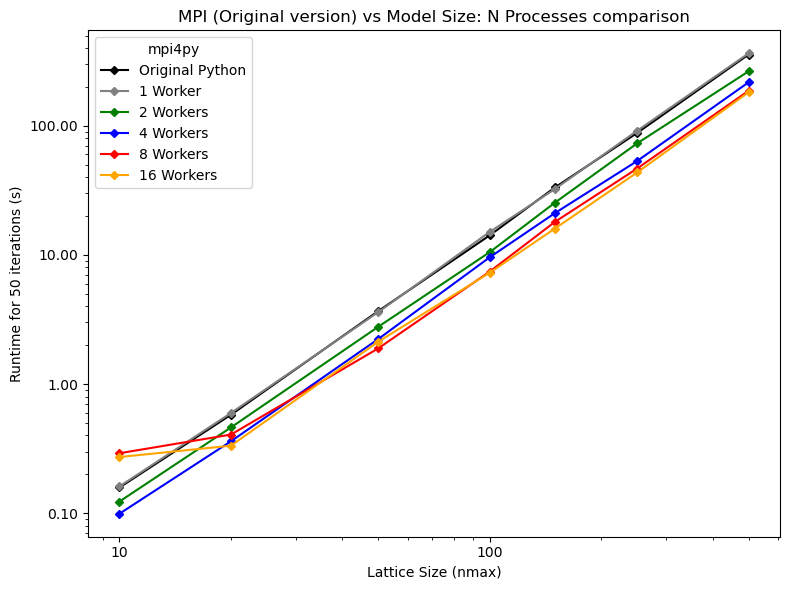

In [7]:
# Load the time vs lattice size data 
mpi_processes_df = pd.read_csv('mpi_original_v_size.csv')


# Define workers
nprocesses = ['Original Python',
            '1 Worker',  
            '2 Workers', 
            '4 Workers', 
            '8 Workers',
            '16 Workers']


fig, ax = plt.subplots(figsize=(8,6))

# Plot each worker number
for nworker, colour in zip(nprocesses, colours_threads):
    ax.plot(mpi_processes_df['Lattice size'], 
            mpi_processes_df[nworker], 
            label=nworker, color=colour, 
            marker='D', 
            linestyle='-', 
            markersize=4)

# set log scale for each axis 
ax.set_xscale('log')
ax.set_yscale('log')

# Format plot 
tickformat = ticker.ScalarFormatter() 
ax.xaxis.set_major_formatter(tickformat)
decimal_tick = ticker.FormatStrFormatter('%.2f')
ax.yaxis.set_major_formatter(decimal_tick)

ax.set_xlabel('Lattice Size (nmax)')
ax.set_ylabel('Runtime for 50 iterations (s)')
ax.legend(title='mpi4py')
ax.set_title('MPI (Original version) vs Model Size: N Processes comparison', fontsize=12)
plt.tight_layout()
plt.show()

**Parallel Methods vs number of threads / workers**

Comparing parallel scaling efficiency among methods (using a small model (nmax=50) and a large model (nmax=500))

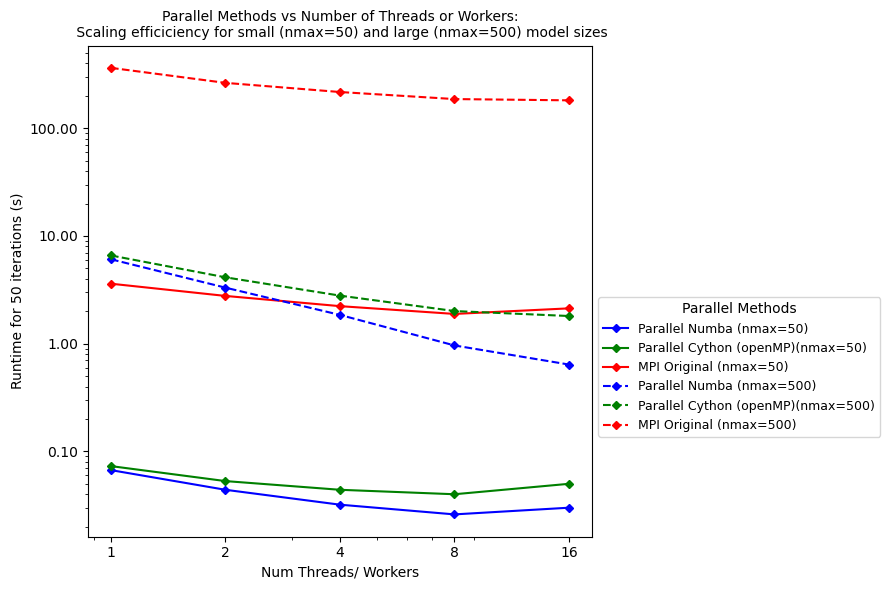

In [8]:
parallel_methods_df = pd.read_csv('parallel_methods_v_nthreads.csv')


# Define methods
p_methods = ['Parallel Numba (nmax=50)', 'Parallel Cython (openMP)(nmax=50)', 'MPI Original (nmax=50)',
             'Parallel Numba (nmax=500)', 'Parallel Cython (openMP)(nmax=500)', 'MPI Original (nmax=500)']

# Set colours and markers 
p_colours = ['blue', 'green', 'red', 'blue', 'green', 'red']
p_linestyles = ['-','-','-','--','--','--']

fig, ax = plt.subplots(figsize=(9,6))

# Plot each parallel method 
for p_method, colour, linestyle in zip(p_methods, p_colours, p_linestyles):
    ax.plot(parallel_methods_df['Num Threads/ Workers'], 
            parallel_methods_df[p_method], 
            label=p_method, color=colour, 
            marker='D', 
            linestyle=linestyle, 
            markersize=4)

# set log scale for each axis 
ax.set_yscale('log')
ax.set_xscale('log')

# Format plot 

decimal_tick = ticker.FormatStrFormatter('%.2f')
ax.yaxis.set_major_formatter(decimal_tick)

# manually set x-axis tick labels 
ax.set_xticks([1, 2, 4, 8, 16])
ax.set_xticklabels(['1', '2', '4', '8', '16'])

ax.set_xlabel('Num Threads/ Workers')
ax.set_ylabel('Runtime for 50 iterations (s)')
ax.legend(title='Parallel Methods', loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=9)
ax.set_title('Parallel Methods vs Number of Threads or Workers:\n Scaling efficiciency for small (nmax=50) and large (nmax=500) model sizes', fontsize=10)
plt.tight_layout()
plt.show()
